In [1]:
%load_ext autoreload
%autoreload 2

# Importing libraries

In [2]:
import os
import sys

sys.path.append("../src/")

In [3]:
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt

In [4]:
from motion_detection import BasicDetector, AverageDetector, MogDetector
from frames_convertion import frequency_conversion

# Loading background and object images

In [87]:
background = cv2.imread("../../data/car_bottom/car_bottom1.jpg")[..., ::-1]
bomb = cv2.imread("../../data/bombs/c4_csgo.webp")[..., ::-1]

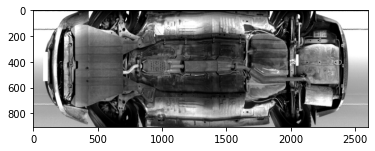

In [88]:
plt.imshow(background)

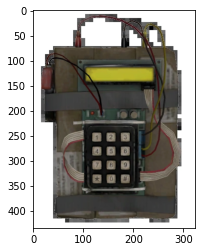

In [89]:
plt.imshow(bomb)

In [90]:
print(f"Background shape: {background.shape} \t Bomb shape: {bomb.shape}")

Background shape: (904, 2599, 3) 	 Bomb shape: (435, 323, 3)


In [91]:
bomb = cv2.resize(bomb, (128, 128))

(128, 128, 3)


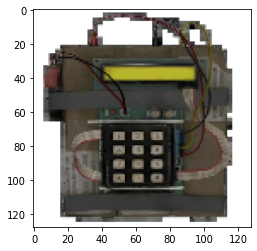

In [92]:
print(bomb.shape)
plt.imshow(bomb)

# BasicDetector test

In [93]:
basic_detector = BasicDetector(background, 120)

## Creating a test image

In [94]:
x_offset, y_offset = 1000, 250
x_width, y_height = bomb.shape[:2]
frame_img = background.copy()
frame_img[y_offset:y_offset+y_height, x_offset:x_offset+x_width] = bomb

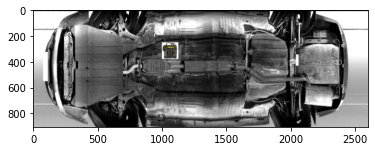

In [95]:
plt.imshow(frame_img)

## Testing motion detection

In [96]:
bboxes = basic_detector.detect(frame_img)

In [97]:
len(bboxes)

1

## Drawing bboxes

In [98]:
frame_img_annot = frame_img.copy()
x, y, w, h = bboxes[0]
cv2.rectangle(frame_img_annot, (x, y), (x+w, y+h), color=(0, 255, 0), thickness=4)

array([[[ 31,  31,  31],
        [ 30,  30,  30],
        [ 31,  31,  31],
        ...,
        [ 27,  27,  27],
        [ 29,  29,  29],
        [ 26,  26,  26]],

       [[ 32,  32,  32],
        [ 32,  32,  32],
        [ 33,  33,  33],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       ...,

       [[183, 183, 183],
        [182, 182, 182],
        [185, 185, 185],
        ...,
        [190, 190, 190],
        [193, 193, 193],
        [195, 195, 195]],

       [[185, 185, 185],
        [184, 184, 184],
        [184, 184, 184],
        ...,
        [190, 190, 190],
        [194, 194, 194],
        [196, 196, 196]],

       [[188, 188, 188],
        [186, 186, 186],
        [184, 184, 184],
        ...,
        [190, 190, 190],
        [194, 194, 194],
        [197, 197, 197]]

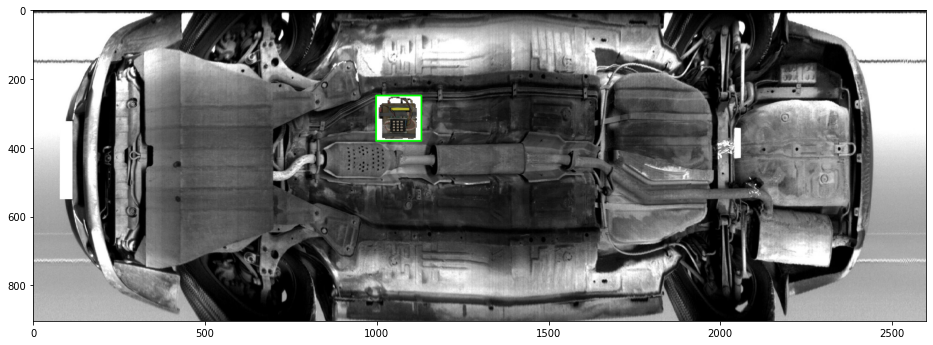

In [99]:
plt.figure(figsize=(16, 9))
plt.imshow(frame_img_annot)
plt.show()

# AverageDetector test

In [ ]:
average_detector = AverageDetector(alpha=0.5)

## Loading test video

In [ ]:
video.release()

In [ ]:
video = cv2.VideoCapture("../data/videos/video6.mp4")

In [ ]:
output_frames = []
output_frames_diffs = []
while True:
    is_read, frame = video.read()
    if not is_read:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    output_frames_diffs.append(average_detector.get_frame_difference(frame, 50))
    detections = average_detector.detect(frame, threshold=50)
    for detection in detections:
        x, y, width, height = detection
        cv2.rectangle(frame, (x, y), (x+width, y+height), thickness=8, color=(0, 0, 255))
        
    output_frames.append(frame)
        
video.release()

In [ ]:
height, width = output_frames[-1].shape[:2]
video_writer = cv2.VideoWriter(
    "video6-with-detection.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height)
)

In [ ]:
for frame in output_frames:
    video_writer.write(frame)
    
video_writer.release()

In [ ]:
len(output_frames)

In [ ]:
plt.imshow(output_frames[80])

In [ ]:
plt.figure(figsize=(16, 9))
plt.imshow(output_frames_diffs[55], cmap="gray")
plt.show()

In [ ]:
height, width = output_frames_diffs[-1].shape[:2]
video_writer = cv2.VideoWriter(
    "video6-frames-diffs.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height)
)

In [ ]:
for frame in output_frames_diffs[1:]:
    video_writer.write(frame)
    
video_writer.release()

# Test data generation

In [5]:
background_rect = cv2.imread("../data/blue_rectangle.jpg")[..., ::-1]
foreground_rect = cv2.imread("../data/purple_rectangle.png")[..., ::-1]

In [6]:
foreground_rect = foreground_rect[25:225, 25:225]

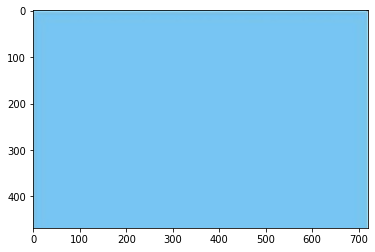

In [7]:
plt.imshow(background_rect)

In [8]:
background_rect.shape, foreground_rect.shape

((468, 720, 3), (200, 200, 3))

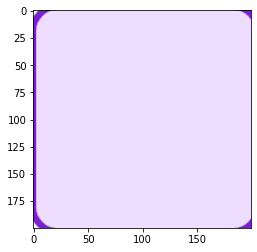

In [86]:
plt.imshow(foreground_rect)

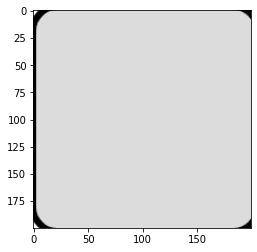

In [9]:
plt.imshow(cv2.cvtColor(foreground_rect, cv2.COLOR_BGR2GRAY), cmap="gray")

In [10]:
generated_frames = [background_rect]
for i in range(300):
    x, y, width, height = 10 + i, 150, foreground_rect.shape[1], foreground_rect.shape[0]
    generated_frame = background_rect.copy()
    generated_frame[y:y+height, x:x+width] = foreground_rect
    generated_frames.append(generated_frame)

In [11]:
len(generated_frames)

301

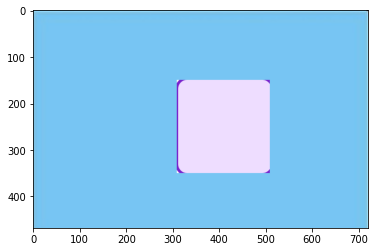

In [12]:
plt.imshow(generated_frames[300])

## BasicDetector

In [13]:
basic_detector = BasicDetector(background_rect, 20)
frames_diffs_basic = []
for frame in generated_frames:
    frames_diffs_basic.append(basic_detector.get_frame_difference(frame, 20))

In [14]:
len(frames_diffs_basic)

301

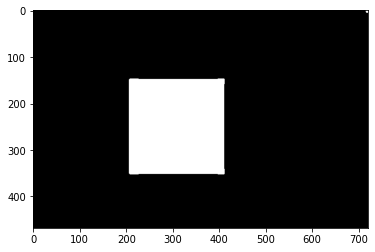

In [20]:
plt.imshow(frames_diffs_basic[200], cmap="gray")

## AverageDetector

In [16]:
average_detector = AverageDetector()
frames_diffs_average = []
for frame in generated_frames:
    frames_diffs_average.append(average_detector.get_frame_difference(frame, 20))

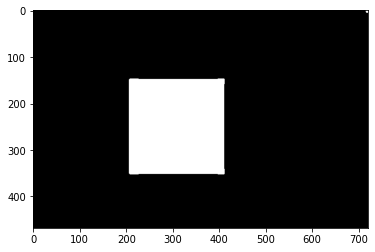

In [21]:
plt.imshow(frames_diffs_average[200], cmap="gray")

## MogDetector

In [18]:
mog_detector = MogDetector()
frames_diffs_mog = []
for frame in generated_frames:
    frames_diffs_mog.append(mog_detector.get_frame_difference(frame))

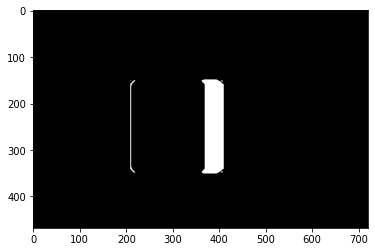

In [19]:
plt.imshow(frames_diffs_mog[200], cmap="gray")

In [ ]:
plt.figure(figsize=(16, 9))
plt.imshow(frames_diffs_mog[200], cmap="gray")
plt.show()

## Frequency conversion

In [22]:
frames_diffs_freq_conv = frequency_conversion(generated_frames, 20, step=1)

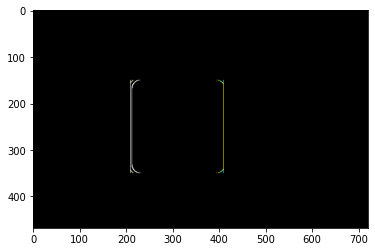

In [23]:
plt.imshow(frames_diffs_freq_conv[200], cmap="gray")

In [ ]:
plt.figure(figsize=(16, 9))
plt.imshow(frames_diffs_freq_conv[40], cmap="gray")
plt.show()

## Write results

### Basic

In [28]:
height, width = generated_frames[0].shape[:2]
video_writer = cv2.VideoWriter(
    "generated-data-test-basic.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height),
    isColor=False
)

In [29]:
for frame in frames_diffs_basic:
    video_writer.write(frame)
    
video_writer.release()

###  Average

In [39]:
height, width = generated_frames[0].shape[:2]
video_writer = cv2.VideoWriter(
    "generated-data-test-average.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height),
    isColor=False
)

In [40]:
for frame in frames_diffs_average[1:]:
    video_writer.write(frame)
    
video_writer.release()

### Mog

In [41]:
height, width = generated_frames[0].shape[:2]
video_writer = cv2.VideoWriter(
    "generated-data-test-mog.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height),
    isColor=False
)

In [42]:
for frame in frames_diffs_mog:
    video_writer.write(frame)
    
video_writer.release()

### Frequency difference

In [64]:
height, width = generated_frames[0].shape[:2]
video_writer = cv2.VideoWriter(
    "generated-data-test-freq-conv.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height),
    isColor=True
)

In [65]:
for frame in frames_diffs_freq_conv:
    video_writer.write(frame)
    
video_writer.release()

## Detection test

### Basic

In [71]:
basic_detector = BasicDetector(background_rect, 20)
output_frames_basic = []
for frame in generated_frames:
    detections = basic_detector.detect(frame)
    
    frame_annot = frame.copy()
    for detection in detections:
        x, y, width, height = detection
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    output_frames_basic.append(frame_annot)

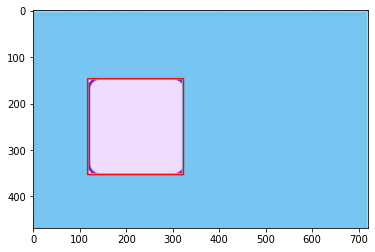

In [72]:
plt.imshow(output_frames_basic[111])

In [73]:
detections

[(306, 147, 206, 206)]

In [49]:
def write_video(frames, name, is_colored=True):
    height, width = frames[0].shape[:2]
    video_writer = cv2.VideoWriter(
        f"{name}.mp4",
        cv2.VideoWriter_fourcc(*"mp4v"),
        30,
        (width, height),
        isColor=is_colored
    )
    
    for frame in frames:
        video_writer.write(frame)

    video_writer.release()

In [56]:
write_video(output_frames_basic, "detections-basic", is_colored=True)

### Average

In [67]:
average_detector = AverageDetector(background_rect, 20)
output_frames_average = []
for frame in generated_frames:
    detections = average_detector.detect(frame)
    
    frame_annot = frame.copy()
    for detection in detections:
        x, y, width, height = detection
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    output_frames_average.append(frame_annot)

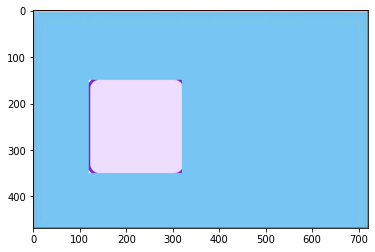

In [68]:
plt.imshow(output_frames_average[111])

In [69]:
write_video(output_frames_average, "detections-average", is_colored=True)

In [70]:
detections

[(0, 0, 720, 468)]

### Mog

In [60]:
mog_detector = MogDetector()
output_frames_mog = []
for frame in generated_frames:
    detections = mog_detector.detect(frame)
    
    frame_annot = frame.copy()
    for detection in detections:
        x, y, width, height = detection
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    output_frames_mog.append(frame_annot)

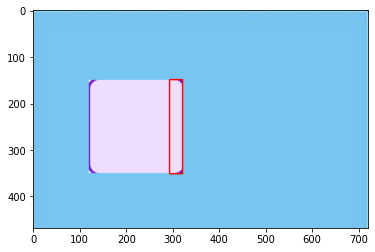

In [61]:
plt.imshow(output_frames_mog[111])

In [63]:
write_video(output_frames_mog, "detections-mog", is_colored=True)

### Frequency conversion

In [83]:
output_frames_freq_conv = []
for i, frame in enumerate(generated_frames[1:]):
    contours, _ = cv2.findContours(
        cv2.cvtColor(frames_diffs_freq_conv[i], cv2.COLOR_RGB2GRAY),
        mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE
    )
    bboxes = []
    for contour in contours:
#         if cv2.contourArea(contour) < 50:
#             continue

        # x, y, width, height = cv2.boundingRect(contour)
        bboxes.append(cv2.boundingRect(contour))
        
    frame_annot = frame.copy()
    for bbox in bboxes:
        x, y, width, height = bbox
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=1)
        
    output_frames_freq_conv.append(frame_annot)

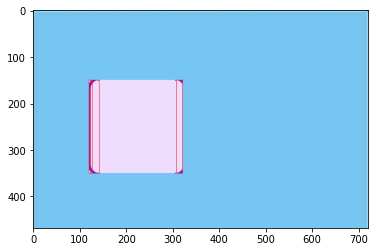

In [84]:
plt.imshow(output_frames_freq_conv[111])

In [85]:
write_video(output_frames_freq_conv, "detections-freq", is_colored=True)